In [10]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
fund_wide_pd = pd.read_csv('./data/fund/fund_wide_good_dtype_pd.csv',low_memory=False)
manager_current_pd = pd.read_csv('./data/manager/manager_current_pd.csv',low_memory=False)
manager_history_pd = pd.read_csv('./data/manager/manager_history_all_1_pd.csv',low_memory=False)
allManager_pd = pd.read_csv('./data/manager/allManager_2_pd.csv',low_memory=False)
fund_wide_pd = fund_wide_pd.fillna(0)

In [391]:
fund_wide_num_pd = fund_wide_pd
# 删除非数字列
for c_name in fund_wide_pd.columns.tolist():
    if fund_wide_num_pd[c_name].dtypes == 'object':
        fund_wide_num_pd.drop(c_name,axis=1,inplace=True)
# fund_wide_path_pd = fund_wide_pd[choice_list]
# print(fund_wide_num_pd.columns.tolist())
fund_wide_num_pd = fund_wide_num_pd.astype('float')

In [372]:
fund_wide_num_pd.columns.tolist()

['code',
 '类型',
 '原费率',
 '现费率',
 '最小申购金额',
 '近一年收益率',
 '近6月收益率',
 '近三月收益率',
 '近一月收益率',
 "('平均值',)",
 "('选证能力',)",
 "('收益率',)",
 "('抗风险',)",
 "('稳定性',)",
 "('管理规模',)",
 '净值回报30天平均值',
 '净值回报90天平均值',
 '净值回报180天平均值',
 '净值回报1年平均值',
 '净值回报2年平均值',
 '净值回报3年平均值',
 '净值回报4年平均值',
 '净值回报5年平均值',
 '同类排名数30天平均值',
 '同类排名数90天平均值',
 '同类排名数180天平均值',
 '同类排名数1年平均值',
 '同类排名数2年平均值',
 '同类排名数3年平均值',
 '同类排名数4年平均值',
 '同类排名数5年平均值',
 'sc30天平均值',
 'sc90天平均值',
 'sc180天平均值',
 'sc1年平均值',
 'sc2年平均值',
 'sc3年平均值',
 'sc4年平均值',
 'sc5年平均值',
 '同类排名百分比30天平均值',
 '同类排名百分比90天平均值',
 '同类排名百分比180天平均值',
 '同类排名百分比1年平均值',
 '同类排名百分比2年平均值',
 '同类排名百分比3年平均值',
 '同类排名百分比4年平均值',
 '同类排名百分比5年平均值',
 '沪深300累计收益率30天平均值',
 '沪深300累计收益率90天平均值',
 '沪深300累计收益率180天平均值',
 '同类平均累计收益率30天平均值',
 '同类平均累计收益率90天平均值',
 '同类平均累计收益率180天平均值',
 '分红180天总金额',
 '分红180天次数',
 '分红1年总金额',
 '分红1年次数',
 '分红2年总金额',
 '分红2年次数',
 '分红30天总金额',
 '分红30天次数',
 '分红3年总金额',
 '分红3年次数',
 '分红4年总金额',
 '分红4年次数',
 '分红5年总金额',
 '分红5年次数',
 '分红90天总金额',
 '分红90天次数',
 '近30天净值回报率',
 '近90天净值回报率',
 '近180天净

In [408]:
# 设定目标
select_list = [
    ' 经理星级', '经理在这个基金工作时间', '经理资金数', '经理基金数', '经理平均分', '经理经验值', '经理收益率',
    '经理抗风险', '经理稳定性', '经理择时能力', '经理任期收益', '经理同类平均', '经理沪深300', '经理跟踪误差',
    '经理超额收益', '经理管理规模'
]

select_list = [
    '5星评级家数', '上海证券', '招商证券', '济安金信', '上海证券3年期评级', '上海证券5年期评级', '招商证券3年期评级',
    '济安金信3年期评级'
]

select_list = [
    '基金投资风格2019年2季度',
    '基金投资风格2019年1季度',
    '基金投资风格2018年4季度',
    '基金投资风格2018年3季度',
    '基金投资风格2018年2季度',
    '基金投资风格2018年1季度',
    '基金投资风格2017年4季度',
    '基金投资风格2017年3季度',
]

select_list = [
    '标准差近1年',
    '标准差近2年',
    '标准差近3年',
    '夏普比率近1年',
    '夏普比率近2年',
    '夏普比率近3年',
]

select_list = [
    '沪深300累计收益率30天平均值', '沪深300累计收益率90天平均值', '沪深300累计收益率180天平均值',
    '同类平均累计收益率30天平均值', '同类平均累计收益率90天平均值', '同类平均累计收益率180天平均值'
]

select_list = [
    '同类排名数5年上升',
    '同类排名数4年上升',
    '同类排名数3年上升',
    '同类排名数2年上升',
    '同类排名数1年上升',
    '同类排名数180天上升',
    '同类排名数90天上升',
    '同类排名数30天上升',
]
select_list = [
    '同类排名数5年上升',
    '同类排名数4年上升',
    '同类排名数3年上升',
    '同类排名数2年上升',
    '同类排名数1年上升',
    '同类排名数180天上升',
    '同类排名数90天上升',
    '同类排名数30天上升',
]

select_list = [
    "('平均值',)",
    "('选证能力',)",
    #     "('收益率',)",
    "('抗风险',)",
    "('稳定性',)",
    "('管理规模',)",
]

select_list = [
    '分红180天总金额',
    '分红180天次数',
    '分红1年总金额',
    '分红1年次数',
    '分红2年总金额',
    '分红2年次数',
    '分红30天总金额',
    '分红30天次数',
    '分红3年总金额',
    '分红3年次数',
    '分红4年总金额',
    '分红4年次数',
    '分红5年总金额',
    '分红5年次数',
    '分红90天总金额',
    '分红90天次数',
]

drop_list1 = [
    '分红180天总金额',
    '分红180天次数',
    '分红1年总金额',
    '分红1年次数',
    '分红2年总金额',
    '分红2年次数',
    '分红30天总金额',
    '分红30天次数',
    '分红3年总金额',
    '分红3年次数',
    '分红4年总金额',
    '分红4年次数',
    '分红5年总金额',
    '分红5年次数',
    '分红90天总金额',
    '分红90天次数',
]


drop_list2 = [
    '同类排名百分比30天平均值', '同类排名百分比90天平均值', '同类排名百分比180天平均值', '同类排名百分比1年平均值',
    '同类排名百分比2年平均值', '同类排名百分比3年平均值', '同类排名百分比4年平均值', '同类排名百分比5年平均值',
    '同类排名数30天平均值', '同类排名数90天平均值', '同类排名数180天平均值', '同类排名数1年平均值', '同类排名数2年平均值',
    '同类排名数3年平均值', '同类排名数4年平均值', '同类排名数5年平均值', '净值回报30天平均值', '净值回报90天平均值',
    '净值回报180天平均值', '净值回报1年平均值', '净值回报2年平均值', '净值回报3年平均值', '净值回报4年平均值',
    '净值回报5年平均值', '近一年收益率', '近6月收益率', '近三月收益率', '近一月收益率', '近30天净值回报率',
    '近90天净值回报率', '近180天净值回报率', '近1年净值回报率', '近2年净值回报率', '近3年净值回报率', '近4年净值回报率',
    '近5年净值回报率'
]
target_pd = fund_wide_num_pd['近3年净值回报率']
data_pd = fund_wide_num_pd.drop(drop_list1, axis=1)
data_pd = data_pd.drop(drop_list2, axis=1)
# data_pd = fund_wide_num_pd.loc[:, select_list]
# data_pd = fund_wide_num_pd
print(data_pd.shape)

(6703, 81)


In [399]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# print(data_mm_np.shape)
#选择K个最好的特征，返回选择特征后的数据
# sk = SelectKBest(chi2, k=2).fit_transform(data_mm_np, target_pd.values.astype('int'))
# sk = SelectKBest(
#     f_classif, k=3).fit_transform(data_pd, target_pd.values.astype('int'))

sk = SelectKBest(f_classif, k=3)
bestFeature = sk.fit_transform(data_pd, target_pd.values.astype('int'))
# k = 3 '经理在这个基金工作时间', '经理同类平均', '经理沪深300'
# k =1 '济安金信'
# k =1 '基金投资风格2017年3季度'
# k = 1'夏普比率近3年'
#     "('选证能力',)" ,"('抗风险',)" ,"('管理规模',)",

#我们想要知道这两个自变量的名字，使用get_support方法即可得到相应的列名
data_pd.columns[sk.get_support()]

/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [  9  54  56  58  60  62  64  66  68  98  99 100 101 102 103 107 108 109
 111 112 113 114 115 116] are constant.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['sc3年平均值', '同类排名百分比3年平均值', '近3年净值回报率'], dtype='object')

In [409]:
# 递归特征消除法
# 使用一个基模型来进行多轮训练，经过多轮训练后，保留指定的特征数。
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe =RFE(
    estimator=LinearRegression(),
    n_features_to_select=2
)
sFeature = rfe.fit_transform(
    data_pd,
    target_pd.values.astype('int')
)

#同理，我们要想知道这两个自变量的名字，使用get_support方法，即可得到对应的列名
# rfe.get_support()
data_pd.columns[rfe.get_support()]


Index(['同类平均累计收益率180天平均值', '5星评级家数'], dtype='object')

In [410]:
# 模型选择法
# 它是一种我们把建好的模型对象传入选择器，然后它会根据这个已经建好的模型，自动帮我吗选择最好的特征值。
import pandas
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

lrModel = LinearRegression()

selectFromModel = SelectFromModel(lrModel)

selectFromModel.fit_transform(
    data_pd,
    target_pd.values.astype('int')
)
selectFromModel.get_support()
data_pd.columns[selectFromModel.get_support()]

Index(['原费率', '现费率', '沪深300累计收益率30天平均值', '沪深300累计收益率90天平均值',
       '沪深300累计收益率180天平均值', '同类平均累计收益率30天平均值', '同类平均累计收益率90天平均值',
       '同类平均累计收益率180天平均值', '5星评级家数', '上海证券', '招商证券', '济安金信', '上海证券3年期评级',
       '上海证券5年期评级', '招商证券3年期评级'],
      dtype='object')

In [289]:
# 归一化 最大最小
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()
data_mm_np = minMax.fit_transform(data_pd)


In [55]:
# 预先 scale，防止数据差距
# from sklearn.preprocessing import scale
# fund_wide_num_scale_pd = scale(fund_wide_num_pd)

# 归一化 标准化 (X-X_mean)/std
from sklearn import preprocessing
# fund_wide_num_divide_pd = fund_wide_num_pd/100
fund_wide_num_scale_pd = preprocessing.scale(fund_wide_num_mm_pd)
# print(X_scaled)
# print(np.var(X_scaled))

In [318]:
from sklearn.feature_selection import VarianceThreshold
 
#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值
vt = VarianceThreshold(threshold=200).fit_transform(data_pd)
print(vt.shape)
#使用get_support方法，可以得到选择特征列的序号，然后根据这个序号在原始数据中把对应的列名选择出来即可
vt.get_support()

(6703, 54)


AttributeError: 'numpy.ndarray' object has no attribute 'get_support'

In [296]:
def getType(o):
    print(type(data_mm_np))

In [148]:
#NumPy常用函数：计算股票收益率和波动率 
# ok
from numpy import *

#简单收益率：相邻两个价格之间的变化率
#20 30 50 45         (30 - 20)/20,(50 - 30)/30,(45 - 50)/45
#对数收益率：所有价格取对数后两两之间的差值
#(log(30) - log(20) = log(30/20))
#log(a) - log(b) = log(a/b)

#diff  std  where  log  sqrt
#diff：返回由相邻数组元素的差值组成的数组
#std：计算标准差，sqrt(((x1 - a)^2 + (x2 - a)^2 + (x3 - a)^2 ...+ (xn - a)^2))/n)
#标准差可以反映一个数据集的离散程度
#where：可以根据设置的条件过滤数组中值的索引

#计算简单收益率
a = array([4, 7, 10, 4])
print('简单收益率', diff(a))

# c = loadtxt('./data/fund/volatility_test.csv', delimiter=',', usecols=(6, ), unpack=True)
c = test_list
print('c',c)
returns = diff(c) / c[:-1]
# print(returns)
print("标准差：", std(returns))



#计算对数收益率
logreturns = diff(log(c))
# logreturns = returns
print('len',len(logreturns))
print('对数收益率',logreturns)

#过滤正的收益率
print('简单收益率（正）的 index', where(returns > 0))
print('对数收益率（正）的 index', where(logreturns > 0))

#股票波动率：是对价格变动的一种衡量。
#年股票波动率：对数收益率的标准差除以对数收益率的平均值，然后再除以252个工作日的倒数的平方根。
annualVolatility = std(logreturns) / mean(logreturns)
annualVolatility = annualVolatility / sqrt(1 / 252)
print("年波动率：", annualVolatility)
print("月波动率：", annualVolatility * sqrt(1 / 12))

简单收益率 [ 3  3 -6]
c [100, 150, 200, 250, 300, 200, 300, 200, 400, 200, 100, 999]
标准差： 2.593173740016986
len 11
对数收益率 [ 0.40546511  0.28768207  0.22314355  0.18232156 -0.40546511  0.40546511
 -0.40546511  0.69314718 -0.69314718 -0.69314718  2.30158459]
简单收益率（正）的 index (array([ 0,  1,  2,  3,  5,  7, 10]),)
对数收益率（正）的 index (array([ 0,  1,  2,  3,  5,  7, 10]),)
年波动率： 60.86968770349778
月波动率： 17.571565290551447


In [117]:
def getAnnualVolatility(data,period = 'year'):
    #计算对数收益率
    logreturns = diff(log(data))
    annualVolatility = std(logreturns) / mean(logreturns)
    annualVolatility = annualVolatility / sqrt(1 / 252)
    if period == 'month':
        annualVolatility = annualVolatility * sqrt(1 / 12)
    return annualVolatility

In [99]:
log(336.1/339.32)

-0.009534880208473978

In [96]:
volatility_test_pd = pd.read_csv('./data/fund/volatility_test.csv',low_memory=False)
# print(volatility_test_pd,250)
# volatility_test_pd.loc[:,'p2']
vol = getDailyVol(volatility_test_pd,250)
print(vol)

0          NaN
1          NaN
2     0.020618
3     0.014662
4     0.012103
5     0.010950
6     0.012136
7     0.011084
8     0.010402
9     0.009749
10    0.009849
11    0.009328
12    0.008908
13    0.008968
14    0.009807
15    0.009538
16    0.014198
17    0.013731
18    0.013299
19    0.013092
20    0.013415
21    0.013049
22    0.012765
23    0.012815
24    0.012508
25    0.012226
26    0.012288
27    0.012156
28    0.012279
29    0.012106
Name: Return, dtype: float64


In [ ]:
from pyecharts import Bar
from pyecharts import online # 远程jshost库，用于导出
from pyecharts import configure
configure(global_theme='dark')
bar = Bar("我的第一个图表", "这里是副标题")
bar.add("服装", ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"], [5, 20, 36, 10, 75, 90])
# bar.show_config()
# bar.render()
bar

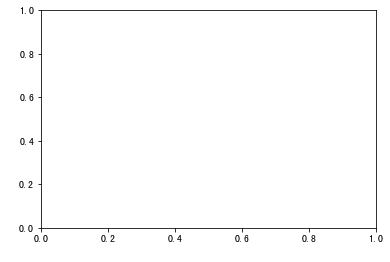

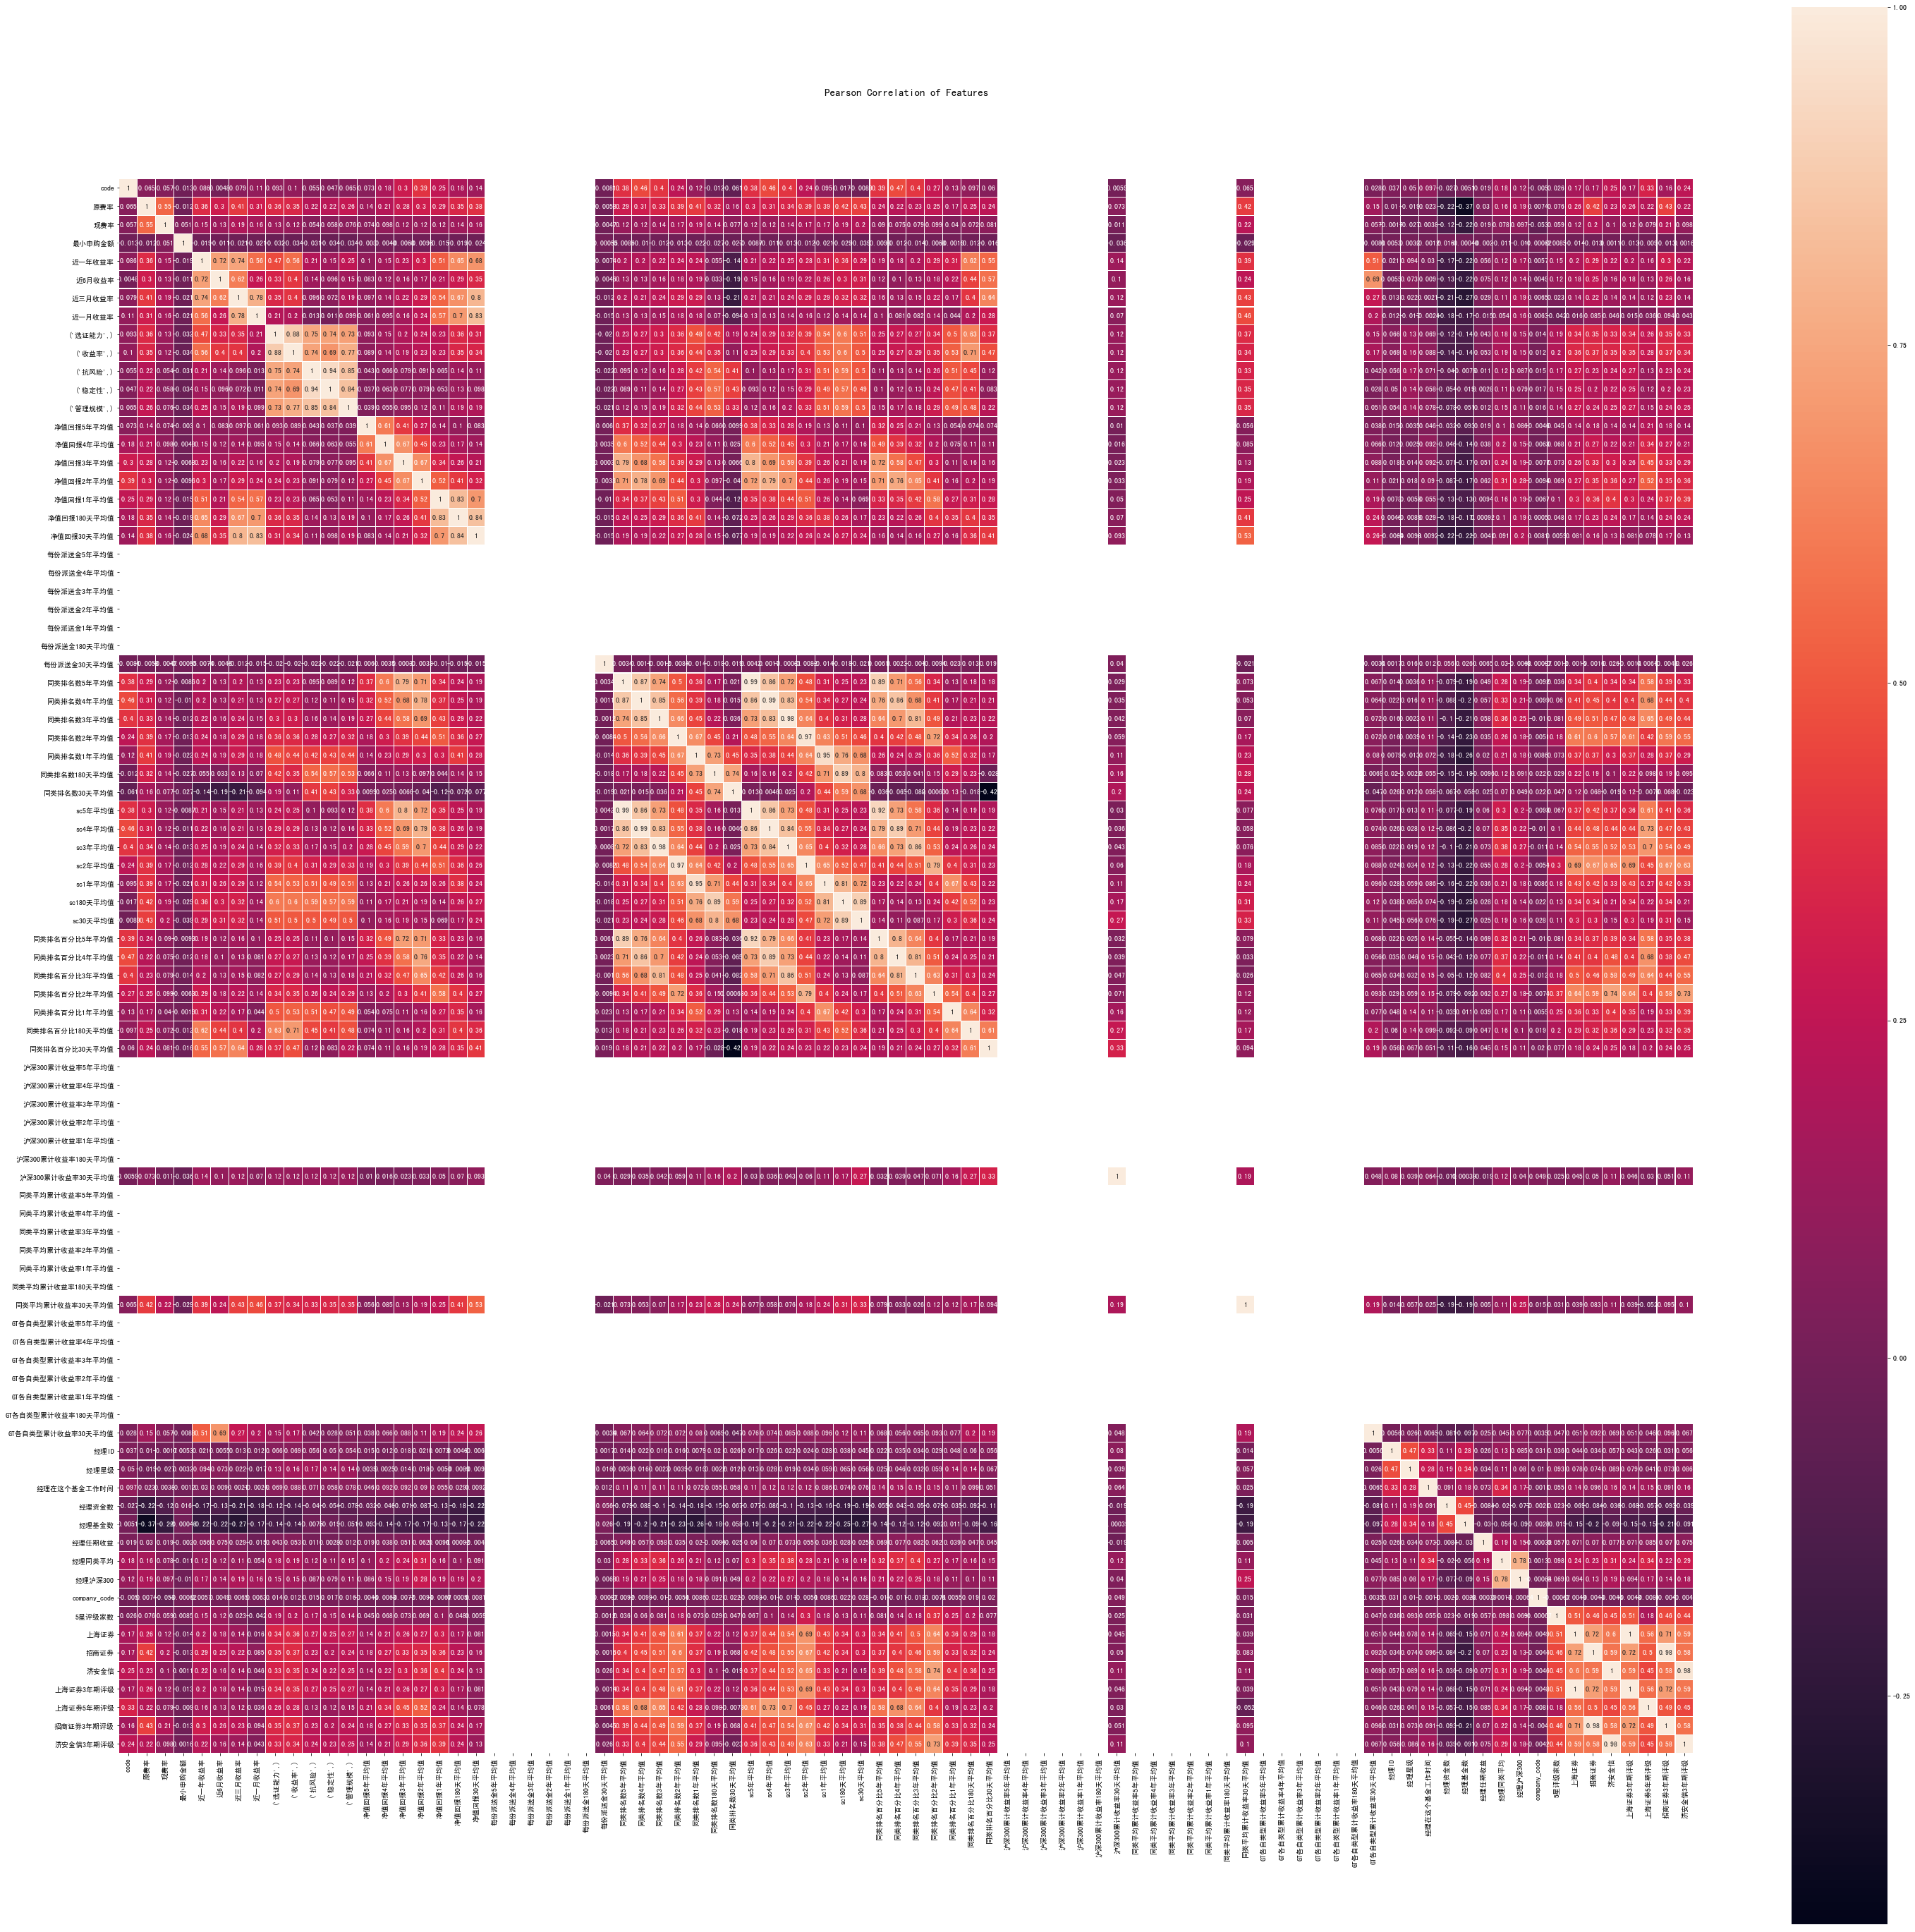

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
# ax.tick_params(axis='x', colors='w')
# ax.tick_params(axis='y', colors='w')



# colormap = plt.cm.viridis
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
plt.figure(figsize=(50, 50))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(
    fund_wide_num_pd.astype(float).corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
#     cmap=colormap,
    linecolor='white',
    annot=True)

# plt.show()

['OFFSETTEXTPAD', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_agg_filter', '_alpha', '_animated', '_autolabelpos', '_axes', '_clipon', '_clippath', '_contains', '_copy_tick_props', '_get_label', '_get_offset_text', '_get_pixel_distance_along_axis', '_get_tick', '_get_tick_bboxes', '_get_tick_boxes_siblings', '_gid', '_gridOnMajor', '_gridOnMinor', '_in_layout', '_label', '_major_tick_kw', '_minor_tick_kw', '_mouseover', '_oid', '_path_effects', '_picker', '_prop_order', '_propobservers', '_rasterized', '_remove_method', '_scale', '_set_artist_props', '_set_gc_clip', '_set_scale', '_sketch', '_smart_bounds', '_snap', '_stale', '_sticky_edges', '_transform', '_tra

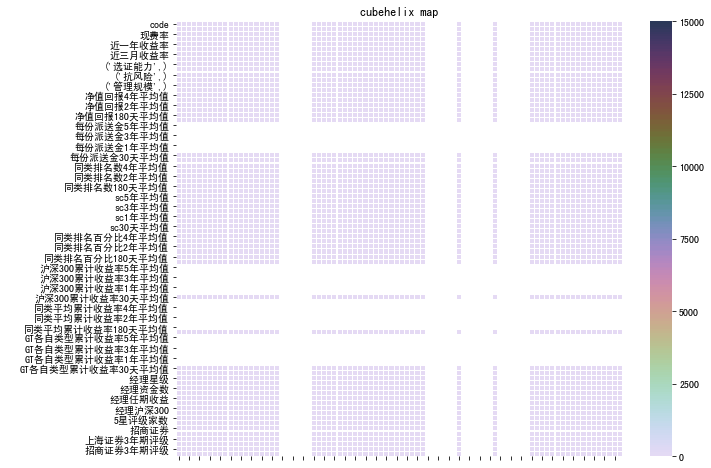

In [42]:
f, (ax1) = plt.subplots(figsize = (10, 8),nrows=1)
# cubehelix map颜色
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(fund_wide_num_pd.astype(float).corr(), linewidths = 0.05, ax = ax1, vmax=15000, vmin=0, cmap=cmap)
ax1.set_title('cubehelix map')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')
ax1.xaxis.label.set_color('w')
ax1.yaxis.label.set_color('w')
print(dir(ax1.xaxis))

In [ ]:
# 画图测试
rank1 = fund_narrow_pd.loc[(fund_narrow_pd[0] == "单位净值")]
rank2 = fund_narrow_pd.loc[(fund_narrow_pd[0] == "净值汇报")]

# rank = fund_narrow_pd.loc[(fund_narrow_pd[0] == "排名") & (fund_narrow_pd[1] == 3511)]

# xmajorLocator   = MultipleLocator(50) #将x主刻度标签设置为20的倍数
# xmajorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式
# xminorLocator   = MultipleLocator(5) #将x轴次刻度标签设置为5的倍数

# ymajorLocator   = MultipleLocator(50) #将y轴主刻度标签设置为0.5的倍数
# ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式
# yminorLocator   = MultipleLocator(0.1) #将此y轴次刻度标签设置为0.1的倍数

fig = plt.figure()
ax = fig.add_subplot(111)
# print(rank.values[1])
ax.plot(rank1.values[0][2:-1], color='green', label=fund_narrow_pd[0])
ax.plot(rank1.values[1][2:-1], color='blue', label=fund_narrow_pd[0])
# ax.plot(rank.values[1][2:-1], color='blue', label=fund_narrow_pd[1])
# ax.plot(rank.values[2][2:-1], color='y', label=fund_narrow_pd[1])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# ax.xaxis.set_major_locator(xmajorLocator)
# ax.xaxis.set_major_formatter(xmajorFormatter)
 
# ax.yaxis.set_major_locator(ymajorLocator)
# ax.yaxis.set_major_formatter(ymajorFormatter)

#设置坐标轴刻度
# my_x_ticks = np.arange(0, 700, 50) #显示范围为-5至5，每0.5显示一刻度
# my_y_ticks = np.arange(0, 1750, 100) #显示范围为-2至2，每0.2显示一刻度
# plt.xticks(my_x_ticks)
# plt.yticks(my_y_ticks)

# 设置刻度范围
# plt.xlim(0,700) 
# plt.ylim(0,500)
# ax.spines['bottom'].set_color('g')
# ax.spines['top'].set_color('blue')
ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.tick_params(axis='y', colors='w')
plt.show()